### Data

In [1]:
plt.style.use('bmh')
color = '#1240AB'

In [2]:
df = pd.read_pickle('../data/df_rents.pkl')

df['reg_split'] = df['reg_year'].map(lambda x: '1. Before 2018' if x < '2018' else '2. After 2018')

delta = 0.05
filt = ~df['Property Size (sq.m) RANK'].between(delta,1-delta)
df.loc[filt, 'Property Size (sq.m)'] = np.nan

df['units_is_1'] = df['No of Units'].map({1:1}).fillna(0).astype(int)
df['contract_years_is_1'] = df['Contract Years'].map({1:1}).fillna(0).astype(int)

print(df.shape)
df[:3]

(5475131, 56)


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Area,Contract Amount,Annual Amount,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Project,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,reg_day,reg_month,reg_quarter,reg_year,st_day,st_month,st_quarter,st_year,Contract Years,Annual Amount unit,Price per sq.m,Annual Amount unit LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Annual Amount unit RANK,Property Size (sq.m) RANK,Price per sq.m RANK,new_version,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,reg_split,units_is_1,contract_years_is_1
0,120220603001774,2022-06-03 12:15:42,2022-06-03,2023-06-02,-120220603001774,Dubai Investment Park First,"6,500.00","6,500.00",10.00,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.00,"6,500.00",650.00,8.78,2.30,6.48,0.05,0.31,0.09,1,1,Dubai Investment Park 1,5.00,18,0,9,5,6,2,2,1,2. After 2018,1,1
1,120220603001738,2022-06-03 12:11:13,2022-06-03,2023-06-02,-120220603001738,Dubai Investment Park First,"7,500.00","7,500.00",10.00,Virtual Unit,Office,Commercial,DANUBE Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,NaN,Virtual Unit,Office,Commercial,Expo 2020 Site,Ibn-e-Battuta Mall,DANUBE Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-03,2022-06-01,2022Q2,2022,1.00,"7,500.00",750.00,8.92,2.30,6.62,0.08,0.31,0.12,1,1,Dubai Investment Park 1,5.00,18,0,9,5,6,2,2,1,2. After 2018,1,1
2,120220603001709,2022-06-03 12:06:54,2022-06-06,2023-06-05,-120220603001709,Burj Khalifa,"10,000.00","10,000.00",19.00,Virtual Unit,Office,Commercial,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,1,NaN,Virtual Unit,Office,Commercial,Downtown Dubai,Dubai Mall,Buj Khalifa Dubai Mall Metro Station,,2022-06-03,2022-06-01,2022Q2,2022,2022-06-06,2022-06-01,2022Q2,2022,1.00,"10,000.00",526.32,9.21,2.94,6.27,0.15,0.69,0.04,1,1,Burj Khalifa,3.00,24,0,14,0,4,2,2,1,2. After 2018,1,1


In [3]:
n = df.shape[0]
s = pd.concat([(df.isnull().sum()).reset_index().T, df.nunique().reset_index().T[1:], df.dtypes.reset_index().T[1:]])
s.index = ['feat','nulls','unique','type']
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
feat,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Area,Contract Amount,Annual Amount,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Project,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,reg_day,reg_month,reg_quarter,reg_year,st_day,st_month,st_quarter,st_year,Contract Years,Annual Amount unit,Price per sq.m,Annual Amount unit LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Annual Amount unit RANK,Property Size (sq.m) RANK,Price per sq.m RANK,new_version,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,reg_split,units_is_1,contract_years_is_1
nulls,0,0,0,2,0,325,170,533,798801,0,3832,55172,562087,598919,346755,0,4680516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,592,533,271388,533,270861,271388,533,270861,271388,0,0,876,876,0,0,0,0,0,0,0,0,0,0,0
unique,2454744,4554167,6621,8542,1121790,216,193975,240562,33265,5,72,10,56,5,14,287,1100,4,31,6,15,6,56,845,4265,146,49,13,5271,266,107,35,119681,241646,945584,241589,45451,927088,475581,301325,1776046,2,2,192,9,193,845,56,6,15,4,31,6,2,2,2
type,int64,datetime64[ns],datetime64[ns],datetime64[ns],int64,object,float64,float64,float64,object,object,object,object,object,object,int64,object,object,object,object,object,object,object,object,datetime64[ns],datetime64[ns],object,object,datetime64[ns],datetime64[ns],object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,object,float64,int64,int64,int64,int64,int64,int64,int64,int64,object,int32,int32


In [4]:
# list(df.columns)
feats1 = [
 'Property Size (sq.m)',
 'Annual Amount unit',
 'Price per sq.m',
]
feats2 = [
 'Property Size (sq.m) LOG',
 'Annual Amount unit LOG',
 'Price per sq.m LOG',
]
feats = feats1 + feats2

feats_rnk = [
 'Property Size (sq.m) RANK',
 'Annual Amount unit RANK',
 'Price per sq.m RANK',
]

feats_cat = [
 'Property Type CLEAN',
 'Property Sub Type CLEAN',
 'Usage CLEAN',
 'Nearest Metro CLEAN',
 'Nearest Mall CLEAN',
 'Nearest Landmark CLEAN',
]
feats_geo = [
 'region',
 'sector',
]
feats_flags = [
 'units_is_1',
 'contract_years_is_1',
 'new_version',
 'free_hold'
]

feat_dt = 'reg_year'
delta = 0.05
interval = (0+delta,1-delta)

### 0. Numeric distributions

592
0


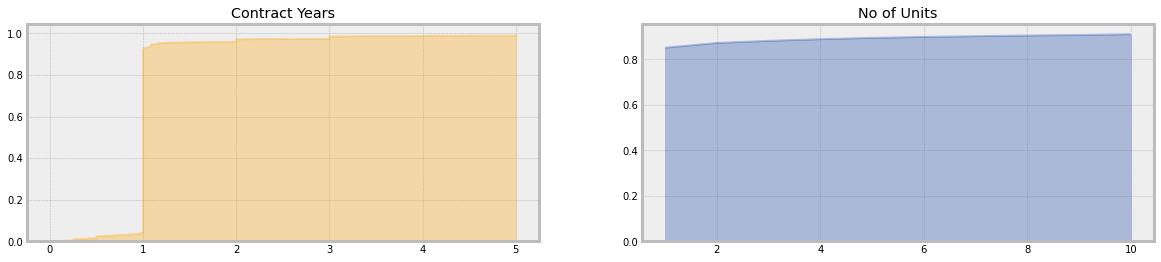

In [5]:
# numeric features distributions
_, ax = plt.subplots(1,2, figsize = (18,4))

feat = 'Contract Years'
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:5].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'orange', title = feat)

feat = 'No of Units'
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:10].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = feat)

798801
533
271388


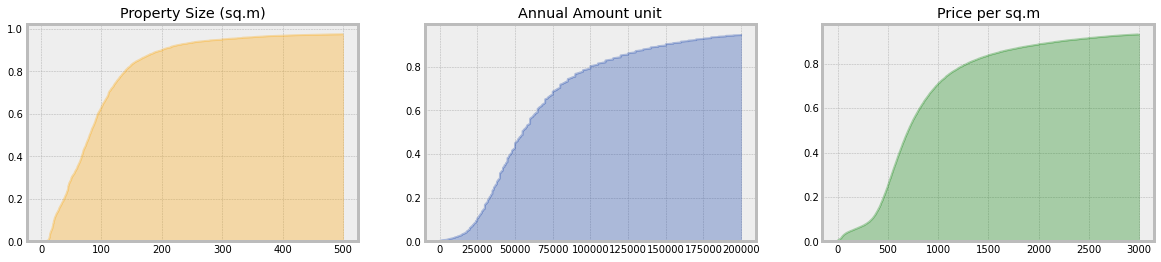

In [6]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats1[0]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:500].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'orange', title = feat)

feat = feats1[1]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:200000].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = feat)

feat = feats1[2]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:3000].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = 'green', title = feat)

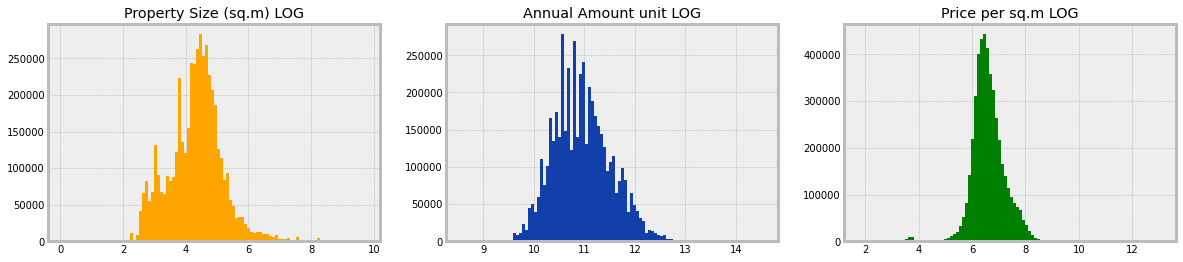

In [7]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats2[0]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[0], bins = 100, color = 'orange')
_ = _.set_title(feat)

feat = feats2[1]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[1], bins = 100, color = color)
_ = _.set_title(feat)

feat = feats2[2]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[2], bins = 100, color = 'green')
_ = _.set_title(feat)

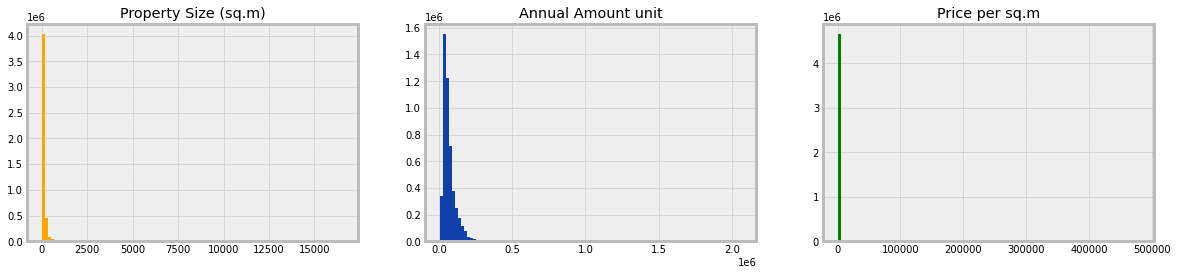

In [8]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats1[0]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[0], bins = 100, color = 'orange')
_ = _.set_title(feat)

feat = feats1[1]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[1], bins = 100, color = color)
_ = _.set_title(feat)

feat = feats1[2]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[2], bins = 100, color = 'green')
_ = _.set_title(feat)

In [9]:
df[feats].describe(percentiles = [0.01,0.03,0.05,0.1, 0.9,0.95,0.97,0.99])

,Property Size (sq.m),Annual Amount unit,Price per sq.m,Property Size (sq.m) LOG,Annual Amount unit LOG,Price per sq.m LOG
count,"4,676,330.00","5,474,598.00","5,203,743.00","5,204,270.00","5,474,598.00","5,203,743.00"
mean,129.07,"90,764.45","3,728.26",4.29,10.95,6.65
std,373.19,"1,535,054.67","234,957.61",1.33,0.88,1.25
min,1.00,0.01,0.00,0.00,-4.62,-11.86
1%,13.00,"6,200.00",26.66,0.00,8.73,3.28
3%,15.00,"15,000.00",66.67,0.69,9.62,4.20
5%,17.00,"19,130.43",150.35,2.48,9.86,5.01
10%,21.89,"25,000.00",342.86,2.89,10.13,5.84
50%,80.38,"55,000.00",704.23,4.39,10.92,6.56
90%,200.00,"150,000.00","2,200.00",5.59,11.92,7.70


### 1. Key property metrics by the year and property type
- number of records
- average/median values
- boxplots

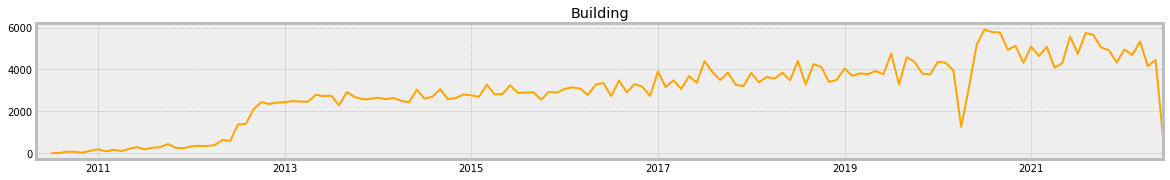

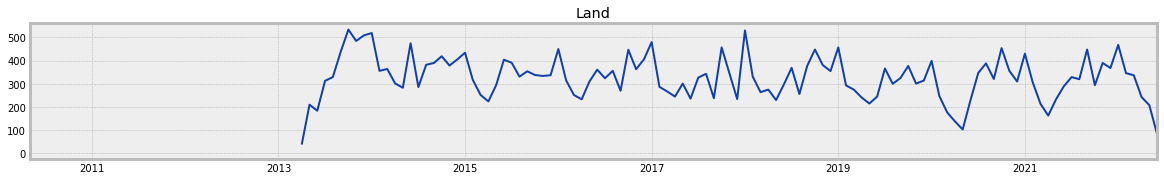

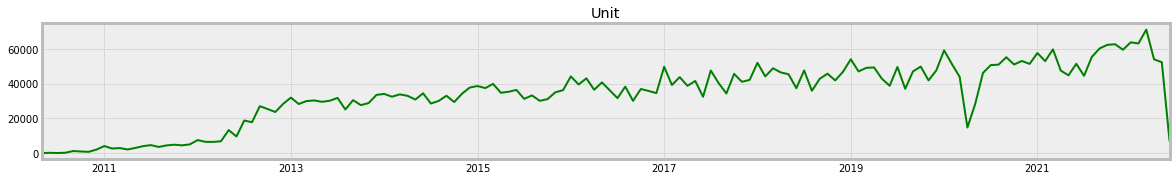

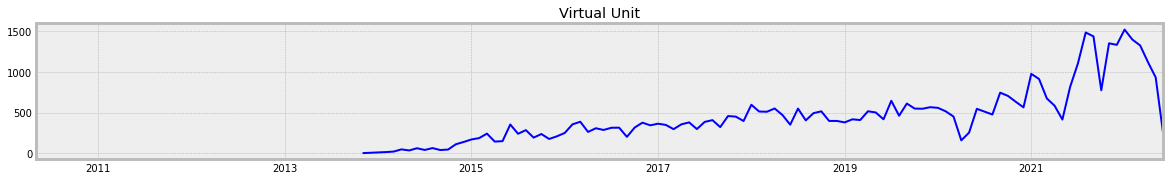

In [10]:
df1 = df.groupby(['reg_month','Property Type CLEAN']).size().unstack()

# _, ax = plt.subplots(4,1, figsize = (15,12))
colors = ['orange',color,'green','blue']
for i,f in enumerate(df1.columns):
    _ = df1[f].plot(figsize = (18,2.5), kind = 'line', xlabel = '', color = colors[i], title = f)
    plt.show()

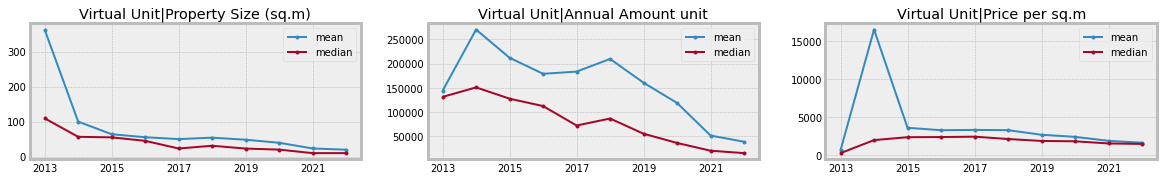

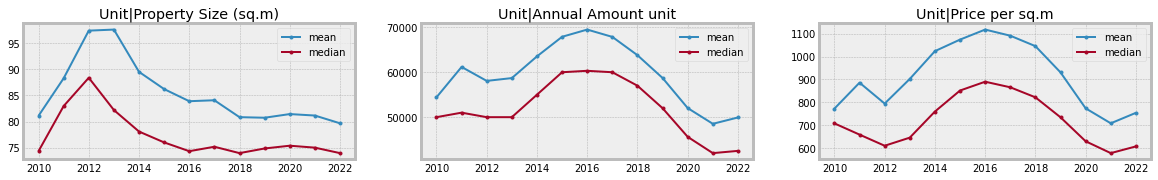

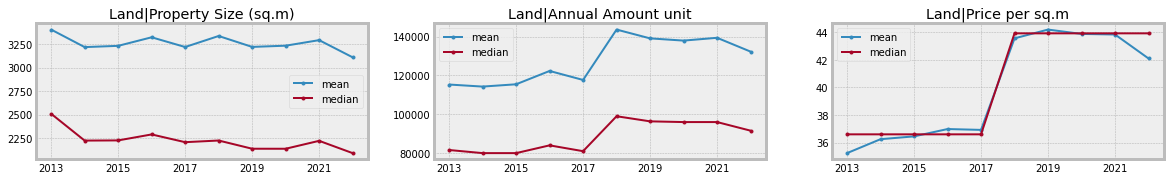

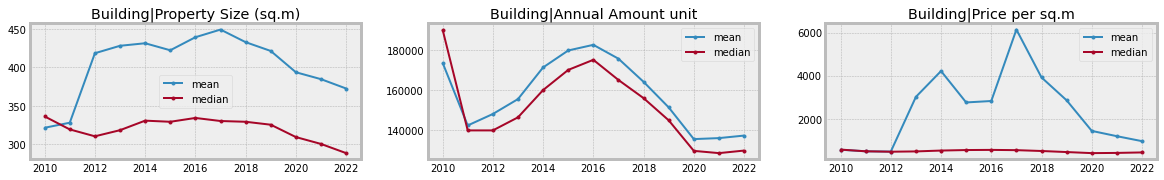

In [11]:
feat1 = feat_dt
for t in df['Property Type CLEAN'].unique():
    # print(t)
    f0 = df['Property Type CLEAN'] == t
    _, ax = plt.subplots(1,3, figsize = (18,2.5))
    for i,feat in enumerate(feats1):
        f1 = df[feat.replace('LOG','').strip()+' RANK'].between(*interval)
        x = df[f0&f1].groupby(feat1)[feat].agg([np.mean,np.median])
        _ = x.plot(ax = ax[i], kind = 'line', style = '.-', title = f'{t}|{feat}', xlabel = '')
    plt.show()

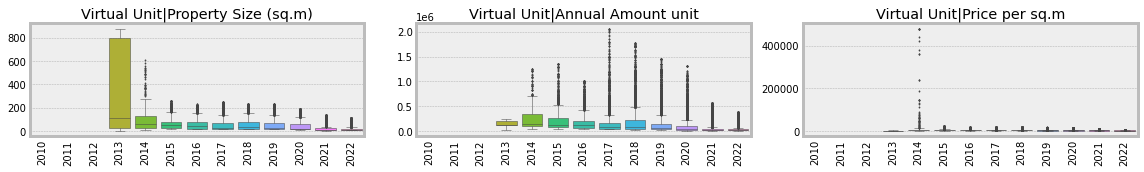

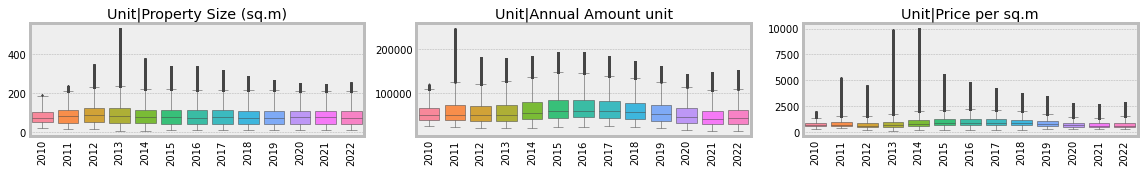

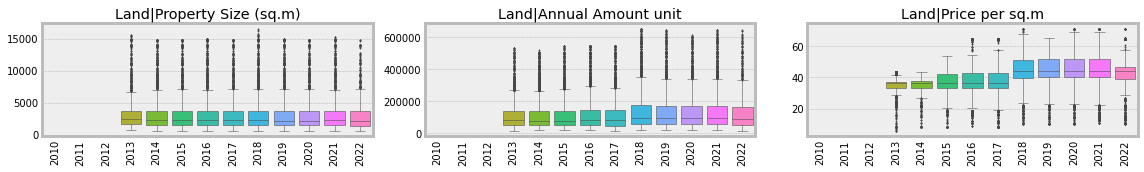

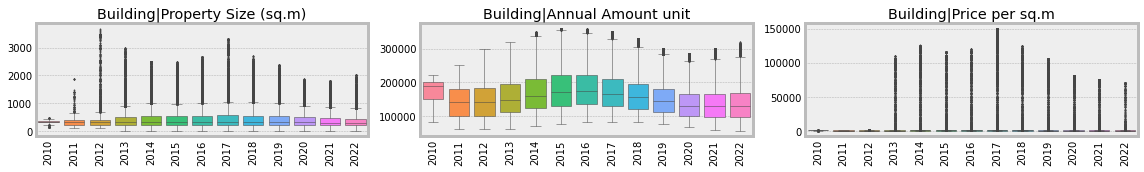

In [12]:
list_type = sorted(df[feat1].unique())

feat1 = feat_dt
for t in df['Property Type CLEAN'].unique():
    # print(t)
    f0 = df['Property Type CLEAN'] == t
    _, ax = plt.subplots(1,3, figsize = (16,2.5))
    for i,feat2 in enumerate(feats1):
        f1 = df[feat2.replace('LOG','').strip()+' RANK'].between(*interval)
        p = sns.boxplot(x=df[f0&f1][feat1], y=df[f0&f1][feat2], order=list_type, ax = ax[i], linewidth=0.5, saturation=1, fliersize = 1)
        p.set_title(f'{t}|{feat2}')
        # p.set_xlim(0,125000)
        p.set_xlabel('')
        p.set_ylabel('')
        _ = p.set_xticklabels(p.get_xticklabels(),rotation=90)
        plt.tight_layout()

### 2. Correlations of amount, price per sq.m with property size
- general
- yearly
- by types

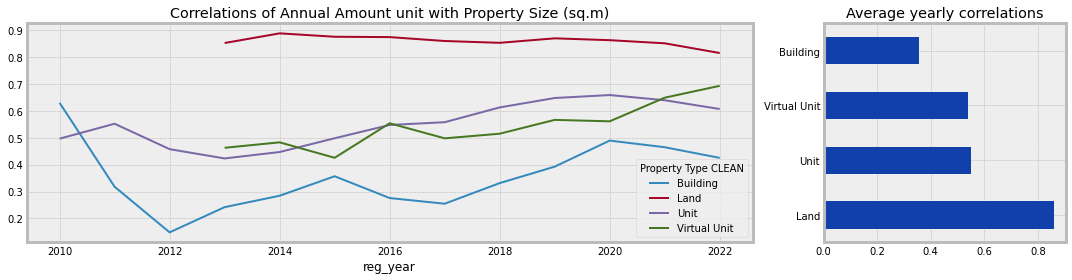

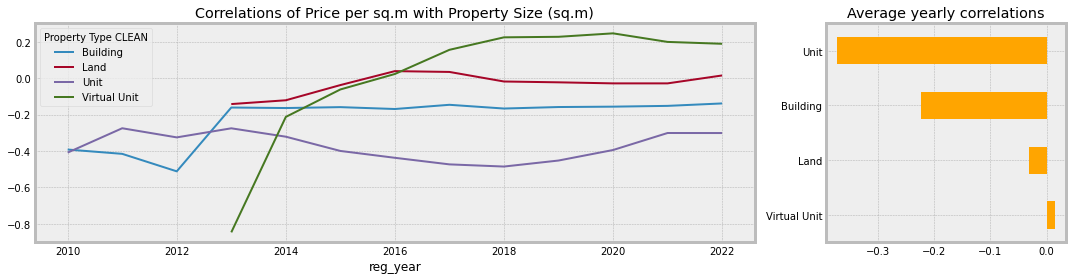

In [13]:
f1 = df[feats_rnk[0]].between(*interval)
f2 = df[feats_rnk[1]].between(*interval)
f3 = df[feats_rnk[2]].between(*interval)

feat1 = 'Property Size (sq.m)'
feats_gr = [feat_dt, 'Property Type CLEAN']

feat2 = feats1[1]
_, ax = plt.subplots(1,2, figsize = (15,4), gridspec_kw={'width_ratios': [3, 1]})
df_corr = df[f1&f2].groupby(feats_gr)[feats1].corr().unstack()[feat1][feat2].unstack()
df_corr.plot(ax = ax[0], title = f'Correlations of {feat2} with {feat1}')
_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = color, ylabel = '', title = 'Average yearly correlations')
plt.tight_layout()

feat2 = feats1[2]
_, ax = plt.subplots(1,2, figsize = (15,4), gridspec_kw={'width_ratios': [3, 1]})
df_corr = df[f1&f3].groupby(feats_gr)[feats1].corr().unstack()[feat1][feat2].unstack()
df_corr.plot(ax = ax[0], title = f'Correlations of {feat2} with {feat1}')
_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = 'orange', ylabel = '', title = 'Average yearly correlations')
plt.tight_layout()


### 3. Statistical tables
- number of records
- average/median values

In [14]:
df_all = pd.DataFrame()
for feat1 in feats_cat + feats_geo + feats_flags:
    df1 = df.groupby([feat1,'reg_split'])[feats1].agg(np.median).unstack()

    df2 = df.groupby([feat1,'reg_split']).size().unstack()
    df2 = df2/df2.sum()
    df2.sort_values('2. After 2018', ascending = False, inplace = True)
    df2['3. Growth'] = (df2['2. After 2018'] - df2['1. Before 2018']) / df2['1. Before 2018']
    cols = list(df2.columns)
    df2.columns = [f'{c} Number of records' for c in cols]
    df3 = pd.concat([df2])
    
    for feat in feats1:
        df2 = df1[feat]
        df2['3. Growth'] = (df2['2. After 2018'] - df2['1. Before 2018']) / df2['1. Before 2018']
        cols = list(df2.columns)
        df2.columns = [f'{c} {feat}' for c in cols]
        df3 = pd.concat([df3,df2], axis = 1)
    
    df3['feat'] = feat1
    df_all = pd.concat([df_all, df3])

df_all.reset_index(inplace = True)
df_all.to_csv('../data/stat1_rents.csv', index = False)

print(df_all.shape)
df_all[:3]

(327, 14)


,index,1. Before 2018 Number of records,2. After 2018 Number of records,3. Growth Number of records,1. Before 2018 Property Size (sq.m),2. After 2018 Property Size (sq.m),3. Growth Property Size (sq.m),1. Before 2018 Annual Amount unit,2. After 2018 Annual Amount unit,3. Growth Annual Amount unit,1. Before 2018 Price per sq.m,2. After 2018 Price per sq.m,3. Growth Price per sq.m,feat
0,Unit,0.91,0.90,-0.01,78.00,74.79,-0.04,"56,925.00","48,000.00",-0.16,798.66,674.56,-0.16,Property Type CLEAN
1,Building,0.08,0.08,0.05,325.00,311.22,-0.04,"160,594.12","135,000.00",-0.16,523.69,431.93,-0.18,Property Type CLEAN
2,Virtual Unit,0.00,0.01,1.84,39.00,19.00,-0.51,"105,770.00","35,000.00",-0.67,"2,400.00","1,765.32",-0.26,Property Type CLEAN


### 4. Geo maps

In [15]:
df_area = pd.read_pickle('../data/df_rents_geo.pkl')
df_sector = df_area.groupby('sector')['geometry1'].first().reset_index().rename(columns = {'geometry1':'geometry'})
df_region = df_area[['region','geometry2']].rename(columns = {'geometry2':'geometry'})

In [16]:
import geopandas as gpd
f1 = df_all['feat'] == 'sector'
df_geo = df_all[f1]
df_geo['sector'] = df_geo['index'].astype(int)
df_geo = df_geo.merge(df_sector)
df_geo = gpd.GeoDataFrame(df_geo)

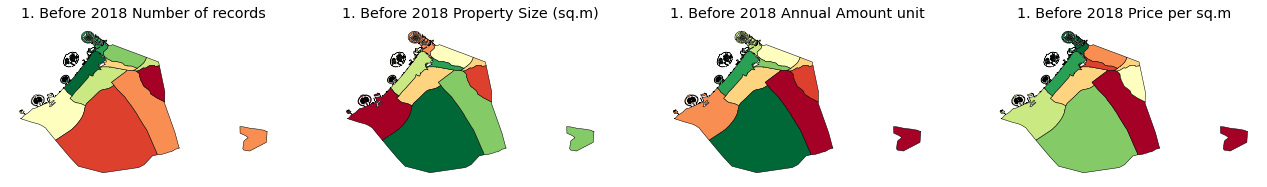

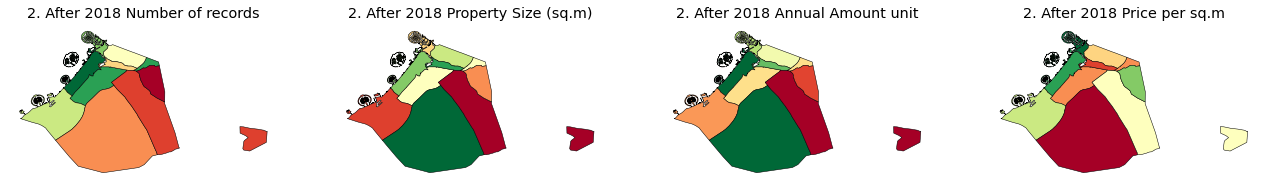

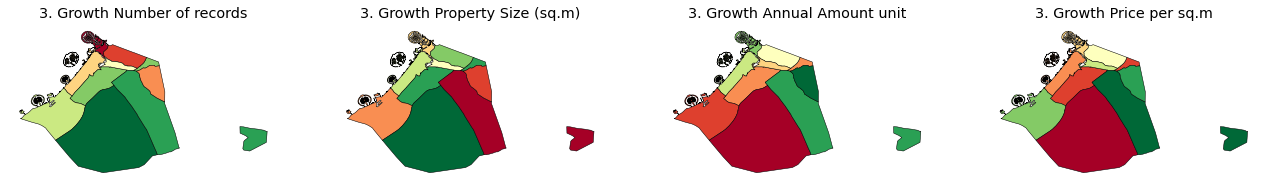

In [17]:
_, ax = plt.subplots(1,4,figsize=(20,8))
feats_all = list(df_all.columns)

feats_plot = [f for f in feats_all if f.find('Before') > 0]
for i,feat in enumerate(feats_plot):
    df_geo[feat] = df_geo[feat].rank()
    p = df_geo.plot(ax = ax[i], edgecolor="black", column = feat, k = 5, cmap = 'RdYlGn')
    _ = p.set_title(feat)
    _ = p.axis('off')
    
_, ax = plt.subplots(1,4,figsize=(20,8))
feats_plot = [f for f in feats_all if f.find('After') > 0]
for i,feat in enumerate(feats_plot):
    df_geo[feat] = df_geo[feat].rank()
    p = df_geo.plot(ax = ax[i], edgecolor="black", column = feat, k = 5, cmap = 'RdYlGn')
    _ = p.set_title(feat)
    _ = p.axis('off')
    
_, ax = plt.subplots(1,4,figsize=(20,8))
feats_plot = [f for f in feats_all if f.find('Growth') > 0]
for i,feat in enumerate(feats_plot):
    df_geo[feat] = df_geo[feat].rank()
    p = df_geo.plot(ax = ax[i], edgecolor="black", column = feat, k = 5, cmap = 'RdYlGn')
    _ = p.set_title(feat)
    _ = p.axis('off')

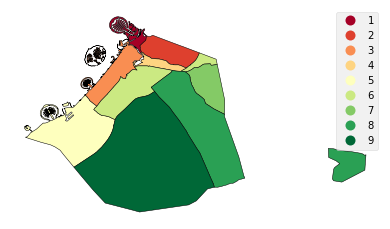

In [18]:
import geopandas as gpd
df_geo = gpd.GeoDataFrame(df_sector)
df_geo['sector'] = df_geo['sector'].astype(str)

_, ax = plt.subplots(1,1,figsize=(6,6))
p = df_geo.plot(ax = ax, edgecolor="black", column = 'sector', k = 5, cmap = 'RdYlGn', legend = 'True')
# _ = p.set_title(f)
_ = p.axis('off')